In [151]:
import pandas as pd
df=pd.read_csv(r'C:\dataset\weatherData\weather_data2024.csv')

In [152]:
df['Date'] = pd.to_datetime(df['Date'])

In [153]:
df.head(4)

,Unnamed: 0,City,Date,Temperature (C),Feels Like (C),Humidity (%),Pressure (hPa),Weather Description,Wind Speed (m/s),Cloudiness (%),Rain (1h mm),Sunrise,Sunset
0,23667840,Delhi,2024-01-01 00:00:00,4.25,6.20,72,945,cold,0.96,76,1.68,2024-01-01 06:28:00,2024-01-01 18:28:00
1,23667841,Delhi,2024-01-01 00:01:00,8.13,10.11,64,1063,windy,1.28,38,2.92,2024-01-01 06:32:00,2024-01-01 18:30:00
2,23667842,Delhi,2024-01-01 00:02:00,21.81,23.56,28,1074,cold,4.55,62,0.92,2024-01-01 06:31:00,2024-01-01 18:28:00
3,23667843,Delhi,2024-01-01 00:03:00,14.49,16.17,43,962,sunny,0.37,50,1.75,2024-01-01 06:29:00,2024-01-01 18:29:00


In [154]:
print(df.dtypes)

Unnamed: 0                      int64
City                           object
Date                   datetime64[ns]
Temperature (C)               float64
Feels Like (C)                float64
Humidity (%)                    int64
Pressure (hPa)                  int64
Weather Description            object
Wind Speed (m/s)              float64
Cloudiness (%)                  int64
Rain (1h mm)                  float64
Sunrise                        object
Sunset                         object
dtype: object


In [155]:
df=df.set_index('Date')
df.head(4)

,Unnamed: 0,City,Temperature (C),Feels Like (C),Humidity (%),Pressure (hPa),Weather Description,Wind Speed (m/s),Cloudiness (%),Rain (1h mm),Sunrise,Sunset
Date,,,,,,,,,,,,
2024-01-01 00:00:00,23667840,Delhi,4.25,6.20,72,945,cold,0.96,76,1.68,2024-01-01 06:28:00,2024-01-01 18:28:00
2024-01-01 00:01:00,23667841,Delhi,8.13,10.11,64,1063,windy,1.28,38,2.92,2024-01-01 06:32:00,2024-01-01 18:30:00
2024-01-01 00:02:00,23667842,Delhi,21.81,23.56,28,1074,cold,4.55,62,0.92,2024-01-01 06:31:00,2024-01-01 18:28:00
2024-01-01 00:03:00,23667843,Delhi,14.49,16.17,43,962,sunny,0.37,50,1.75,2024-01-01 06:29:00,2024-01-01 18:29:00


In [156]:
df=df.resample('D').mean()

C:\Users\cks12\AppData\Local\Temp\ipykernel_24976\563895720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.resample('D').mean()


In [157]:
df.head(4)

,Unnamed: 0,Temperature (C),Feels Like (C),Humidity (%),Pressure (hPa),Wind Speed (m/s),Cloudiness (%),Rain (1h mm)
Date,,,,,,,,
2024-01-01,23668559.5,13.502049,13.479028,49.343056,1001.890972,2.534444,40.145833,2.542312
2024-01-02,23669999.5,13.546368,13.571181,49.510417,997.996528,2.578562,39.526389,2.485514
2024-01-03,23671439.5,13.347778,13.356188,49.487500,999.345139,2.574736,40.758333,2.498118
2024-01-04,23672879.5,13.413382,13.407958,49.876389,1001.019444,2.498257,40.789583,2.499181


In [163]:
trainDF=df["2024-01-01":"2024-07-31"][['Temperature (C)']]
trainDF.tail(4)

,Temperature (C)
Date,
2024-07-28,30.022243
2024-07-29,30.045194
2024-07-30,30.187410
2024-07-31,30.042153


In [164]:
validDF=df["2024-08-01":"2024-12-31"][['Temperature (C)']]
validDF.head(4)

,Temperature (C)
Date,
2024-08-01,30.066000
2024-08-02,30.062354
2024-08-03,29.984583
2024-08-04,29.955604


In [165]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [174]:
length=10
batch_size=1
generator=TimeseriesGenerator(trainDF.to_numpy(),trainDF.to_numpy(),length=length,batch_size=batch_size)


In [191]:
v_generator=TimeseriesGenerator(validDF.to_numpy(),validDF.to_numpy(),length=length,batch_size=batch_size)

In [175]:
X,y=generator[0]

In [179]:
X

array([[[13.50204861],
        [13.54636806],
        [13.34777778],
        [13.41338194],
        [13.23726389],
        [13.44879167],
        [13.33201389],
        [13.42339583],
        [13.30411806],
        [13.54634028]]])

In [203]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, GRU,SimpleRNN


In [209]:
model=Sequential()
#model.add(LSTM(32,input_shape=[10,1],return_sequences=True))
model.add(LSTM(32,input_shape=[10,1]))
model.add(Dense(1))

In [210]:
model.compile(optimizer="adam", loss="mse")

In [211]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4352      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [212]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3)


In [227]:
history=model.fit(generator,validation_data=v_generator,epochs=20,callbacks=[early_stop])

Epoch 1/20
203/203 [==============================] - 1s 7ms/step - loss: 7.0358 - val_loss: 6.1059
Epoch 2/20
203/203 [==============================] - 1s 7ms/step - loss: 5.1767 - val_loss: 10.2622
Epoch 3/20
203/203 [==============================] - 1s 7ms/step - loss: 4.3656 - val_loss: 5.0889
Epoch 4/20
203/203 [==============================] - 1s 7ms/step - loss: 4.2946 - val_loss: 3.8991
Epoch 5/20
203/203 [==============================] - 1s 6ms/step - loss: 3.9196 - val_loss: 3.7000
Epoch 6/20
203/203 [==============================] - 1s 7ms/step - loss: 3.8490 - val_loss: 3.6607
Epoch 7/20
203/203 [==============================] - 1s 7ms/step - loss: 3.8006 - val_loss: 3.6379
Epoch 8/20
203/203 [==============================] - 1s 6ms/step - loss: 3.6124 - val_loss: 3.5253
Epoch 9/20
203/203 [==============================] - 1s 6ms/step - loss: 3.6652 - val_loss: 3.7350
Epoch 10/20
203/203 [==============================] - 1s 7ms/step - loss: 3.7175 - val_loss: 3.747

In [228]:
d=pd.DataFrame(model.history.history)

<Axes: >

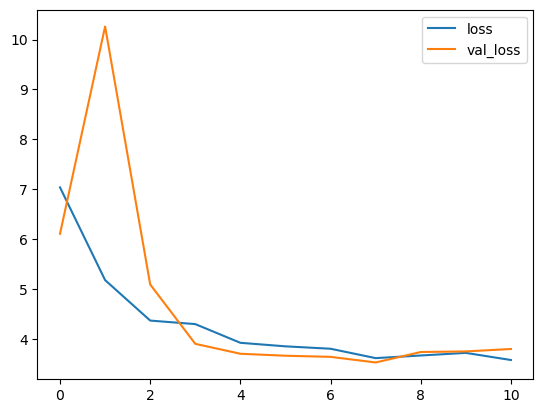

In [229]:
import matplotlib.pyplot as plt
d.plot()

In [ ]:
generator[-5:]